# 03: Run LLMs on CPU vs GPU

This tutorial will show you how to run LLMs on CPU vs GPU with pros and cons.

## 1. Imports

In [1]:
import gc
import copy
# import os
# CACHE_PATH = '<path_to_cache>'
# os.environ["TORCH_HOME"] = CACHE_PATH
# os.environ["HF_HOME"] = CACHE_PATH
# os.environ["HUGGINGFACE_HUB_CACHE"] = CACHE_PATH
# os.environ["HUGGINGFACE_ASSETS_CACHE"] = CACHE_PATH
# os.environ["TRANSFORMERS_CACHE"] = CACHE_PATH

import matplotlib.pyplot as plt
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer
# from huggingface_hub import login; login(token="<hf_token>")

import pruna_pro
from pruna_pro import SmashConfig
from pruna_pro import smash
from pruna.data.pruna_datamodule import PrunaDataModule
from pruna.evaluation.evaluation_agent import EvaluationAgent
from pruna.evaluation.metrics.metric_elapsed_time import ElapsedTimeMetric
from pruna.evaluation.metrics.metric_torch import TorchMetricWrapper
from pruna.evaluation.metrics.metric_energy import EnergyMetric
from pruna.evaluation.metrics.metric_memory import GPUMemoryMetric
from pruna.evaluation.metrics.metric_model_architecture import ModelArchitectureMetric
from pruna.evaluation.task import Task

/home/ubuntu/miniconda3/envs/courses/lib/python3.10/site-packages/transformers/utils/hub.py:128: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


## 2. Utils

The utils functions help for:
- Load from a list of (small) models.  eel free to try other models until the GPU memory is not enough!
- Make plots.
- Iterate over evaluation and model configurations.

In [2]:
model_ids = [
    "facebook/opt-125m",
    "facebook/opt-350m", 
    "facebook/opt-1.3b",
    "facebook/opt-2.7b",
    "meta-llama/Llama-3.2-1B",
    "meta-llama/Llama-3.2-1B-Instruct",
    "meta-llama/Llama-3.2-3B-Instruct",
    "google/gemma-3-1b-it",
    "google/gemma-3-4b-it",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B",
    # "microsoft/Phi-4-mini-instruct",
    # "HuggingFaceTB/SmolLM-135M",
    # "HuggingFaceTB/SmolLM-135M-instruct",
    # "HuggingFaceTB/SmolLM-360M", 
    # "HuggingFaceTB/SmolLM-360M-Instruct",
    # "HuggingFaceTB/SmolLM-1.7B",
    # "HuggingFaceTB/SmolLM-1.7B-Instruct",
    # "HuggingFaceTB/SmolLM2-135M",
    # "HuggingFaceTB/SmolLM2-135M-Instruct",
    # "HuggingFaceTB/SmolLM2-360M",
    # "HuggingFaceTB/SmolLM2-360M-Instruct", 
    # "HuggingFaceTB/SmolLM2-1.7B",
    # "HuggingFaceTB/SmolLM2-1.7B-Instruct",
    # "PleIAs/Pleias-350m-Preview",
    # "PleIAs/Pleias-Pico",
    # "PleIAs/Pleias-1.2b-Preview",
    # "PleIAs/Pleias-Nano",
    # "PleIAs/Pleias-3b-Preview",
]

# Load model and tokenizer for first model in list
model_id = model_ids[0]
model = AutoModelForCausalLM.from_pretrained(model_id)
tokenizer = AutoTokenizer.from_pretrained(model_id)

In [3]:
def evaluate_models(model_ids, metrics, dataset="WikiText"):
    """
    Evaluate multiple models using the specified metrics.
    
    Args:
        model_ids (list): List of model IDs to evaluate
        metrics (list): List of metric instances to compute
    
    Returns:
        dict: Dictionary mapping model IDs to their evaluation results
    """
    results = {}
    
    for model_id in model_ids:
        print(f"\nEvaluating {model_id}")
        
        try:
            # Load model and tokenizer
            model = AutoModelForCausalLM.from_pretrained(model_id, torch_dtype="auto").cuda()
            tokenizer = AutoTokenizer.from_pretrained(model_id)
            
            # Create task and evaluation agent
            task = Task(metrics, datamodule=PrunaDataModule.from_string(dataset, tokenizer=tokenizer))
            eval_agent = EvaluationAgent(task)
            
            # Run evaluation
            model_results = eval_agent.evaluate(model)
            results[model_id] = model_results
            print(f"Results for {model_id}:")
            print(model_results)
            
            # Cleanup
            del model
            del tokenizer
            torch.cuda.empty_cache()
            gc.collect()
            
        except Exception as e:
            print(f"Error evaluating {model_id}: {str(e)}")
            results[model_id] = str(e)
    
    return results

In [4]:
def plot_results(results, metric_name):
    """
    Create a bar plot comparing results across models for a given metric.
    
    Args:
        results (dict): Dictionary with model IDs as keys and evaluation results as values
        metric_name (str): Name of the metric to plot
    """
    models, values = [], []
    
    for model_id, result in results.items():
        # Get model name from full ID
        model_name = model_id.split('/')[-1]
        models.append(model_name)
        
        # Extract metric value
        metric_value = result[metric_name]
        values.append(metric_value)

    # Create bar plot    
    plt.figure(figsize=(10, 6))
    plt.bar(models, values)
    plt.title(f'{metric_name} by Model')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel(metric_name)
    plt.tight_layout()
    plt.show()

## 3. Run LLMs on CPU vs GPU

We recommend to checkout the [Pruna documentation](https://docs.pruna.ai/en/stable/index.html) for access to AI efficiency functions.

### 3.1 Run base LLM on CPU vs GPU

**Implementation task:**
- Benchmark the base models on CPU with respect to the latency metrics.
- Benchmark the base models on GPU with respect to the latency metrics.

**Questions:**
- What is the fastest between running LLM on CPU vs GPU? How would their speed scale with larger batch sizes?
- When is it interesting to run LLM on CPU vs GPU?
- For a CPU/GPU comparison, would it be interesting to evaluate the quality, memory, compute metrics?

In [13]:
### To Complete ###
### End of To Complete ###


Evaluating facebook/opt-125m


Error during conversion: ChunkedEncodingError(ProtocolError('Response ended prematurely'))
INFO - Using max_seq_len of tokenizer: None
INFO - Testing compatibility with functools.partial(<function text_generation_collate at 0x7d2c11d040d0>, tokenizer=GPT2TokenizerFast(name_or_path='facebook/opt-125m', vocab_size=50265, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '</s>', 'eos_token': '</s>', 'unk_token': '</s>', 'pad_token': '<pad>'}, clean_up_tokenization_spaces=False),  added_tokens_decoder={
	1: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
}, max_seq_len=None)...
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
INFO - Using provided list of metri

Results for facebook/opt-125m:
{'inference_elapsed_time_ms_@1': 1332524.4798660278, 'inference_latency_ms_@1': 13325.244798660278, 'inference_throughput_batches_per_ms_@1': 7.504552562520578e-05}

Evaluating facebook/opt-350m


INFO - Testing compatibility with functools.partial(<function text_generation_collate at 0x7d2c11d040d0>, tokenizer=GPT2TokenizerFast(name_or_path='facebook/opt-350m', vocab_size=50265, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '</s>', 'eos_token': '</s>', 'unk_token': '</s>', 'pad_token': '<pad>'}, clean_up_tokenization_spaces=False),  added_tokens_decoder={
	1: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
}, max_seq_len=None)...
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
INFO - Using provided list of metric instances.
INFO - Evaluating a base model.
INFO - Detected transformers model. Using TransformerHandler.
- The first element of the b


Evaluating facebook/opt-125m


INFO - Testing compatibility with functools.partial(<function text_generation_collate at 0x7cdab0d940d0>, tokenizer=GPT2TokenizerFast(name_or_path='facebook/opt-125m', vocab_size=50265, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '</s>', 'eos_token': '</s>', 'unk_token': '</s>', 'pad_token': '<pad>'}, clean_up_tokenization_spaces=False),  added_tokens_decoder={
	1: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
}, max_seq_len=None)...
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
INFO - Using provided list of metric instances.
INFO - Evaluating a base model.
INFO - Detected transformers model. Using TransformerHandler.
- The first element of the b

Results for facebook/opt-125m:
{'inference_elapsed_time_ms_@1': 694.3138856887817, 'inference_latency_ms_@1': 6.943138856887817, 'inference_throughput_batches_per_ms_@1': 0.1440270777543168}

Evaluating facebook/opt-350m


INFO - Testing compatibility with functools.partial(<function text_generation_collate at 0x7cdab0d940d0>, tokenizer=GPT2TokenizerFast(name_or_path='facebook/opt-350m', vocab_size=50265, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '</s>', 'eos_token': '</s>', 'unk_token': '</s>', 'pad_token': '<pad>'}, clean_up_tokenization_spaces=False),  added_tokens_decoder={
	1: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
}, max_seq_len=None)...
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
INFO - Using provided list of metric instances.
INFO - Evaluating a base model.
INFO - Detected transformers model. Using TransformerHandler.
- The first element of the b

Results for facebook/opt-350m:
{'inference_elapsed_time_ms_@1': 1330.0159730911255, 'inference_latency_ms_@1': 13.300159730911254, 'inference_throughput_batches_per_ms_@1': 0.0751870669399461}

Evaluating facebook/opt-1.3b


INFO - Testing compatibility with functools.partial(<function text_generation_collate at 0x7cdab0d940d0>, tokenizer=GPT2TokenizerFast(name_or_path='facebook/opt-1.3b', vocab_size=50265, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '</s>', 'eos_token': '</s>', 'unk_token': '</s>', 'pad_token': '<pad>'}, clean_up_tokenization_spaces=False),  added_tokens_decoder={
	1: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
}, max_seq_len=None)...
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
INFO - Using provided list of metric instances.
INFO - Evaluating a base model.
INFO - Detected transformers model. Using TransformerHandler.
- The first element of the b

Results for facebook/opt-1.3b:
{'inference_elapsed_time_ms_@1': 1607.0059814453125, 'inference_latency_ms_@1': 16.070059814453124, 'inference_throughput_batches_per_ms_@1': 0.06222752195985094}

Evaluating facebook/opt-2.7b


INFO - Testing compatibility with functools.partial(<function text_generation_collate at 0x7cdab0d940d0>, tokenizer=GPT2TokenizerFast(name_or_path='facebook/opt-2.7b', vocab_size=50265, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '</s>', 'eos_token': '</s>', 'unk_token': '</s>', 'pad_token': '<pad>'}, clean_up_tokenization_spaces=False),  added_tokens_decoder={
	1: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
}, max_seq_len=None)...
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
INFO - Using provided list of metric instances.
INFO - Evaluating a base model.
INFO - Detected transformers model. Using TransformerHandler.
- The first element of the b

Results for facebook/opt-2.7b:
{'inference_elapsed_time_ms_@1': 2414.2386322021484, 'inference_latency_ms_@1': 24.142386322021483, 'inference_throughput_batches_per_ms_@1': 0.04142092611151076}


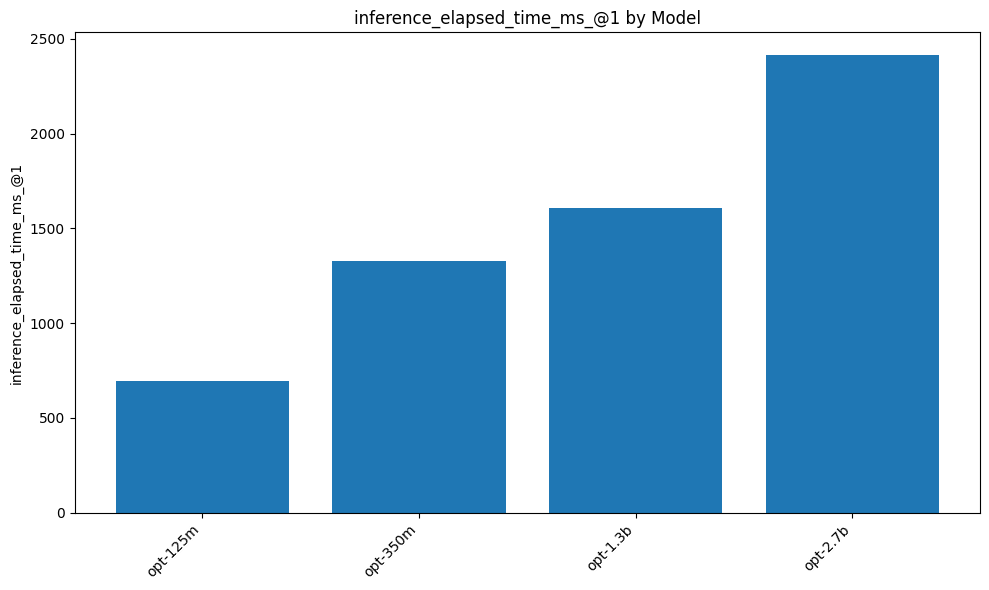

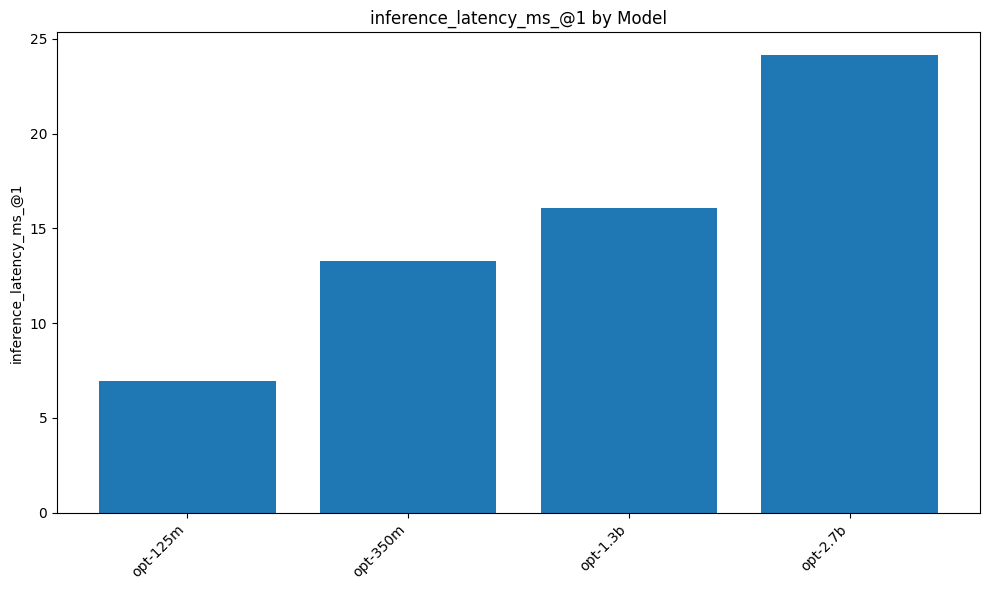

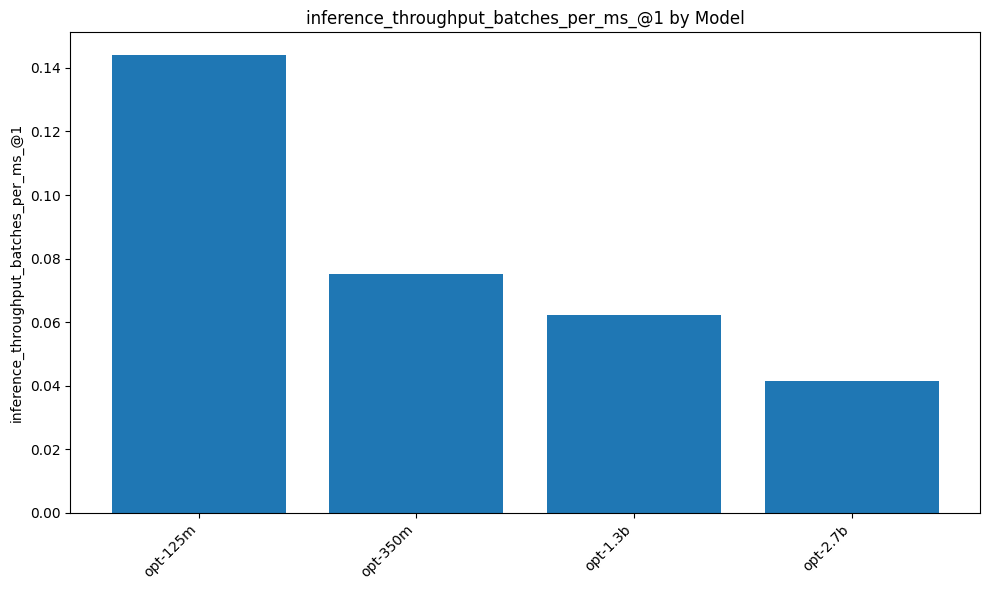

In [12]:
### To Complete ###
### End of To Complete ###

### 3.1 Run quantized LLM on CPU vs GPU

**Implementation task:**
Select a (small) LLM and:
- Quantize it on CPU (e.g. with ipex-llm) and benchmark it on CPU. You might need to install `pip install pruna_pro[intel] --extra-index-url https://pytorch-extension.intel.com/release-whl/stable/cpu/cn/`.
- Quantize it on GPU (e.g. with llm_int8) and benchmark it on GPU.

**Questions:**
- What type of quantization is used in the CPU and GPU quantized models?
- Are the quantized models slower/faster than the base models? Why?
- What would be the recommended setup for real-time interface? for edge interface? 

In [11]:
### To Complete ###
### End of To Complete ###

INFO - Verifying Pruna token.
INFO - You have used 214 hours this month.
INFO - Starting compiler ipex_llm...
INFO - You have used 214 hours this month.


[INFO] SINGLE_INSTANCE MODE.
ipex.llm.optimize is doing the weight only quantization


`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


ipex.llm.optimize has set the optimized or quantization model for model.generate()


INFO - compiler ipex_llm was applied successfully.
INFO - You have used 214 hours this month.


torch.Size([1, 5, 50272])


INFO - Testing compatibility with functools.partial(<function text_generation_collate at 0x7cdab0d940d0>, tokenizer=GPT2TokenizerFast(name_or_path='facebook/opt-125m', vocab_size=50265, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '</s>', 'eos_token': '</s>', 'unk_token': '</s>', 'pad_token': '<pad>'}, clean_up_tokenization_spaces=False),  added_tokens_decoder={
	1: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
}, max_seq_len=None)...
INFO - Using provided list of metric instances.
INFO - Evaluating a smashed model.
INFO - Detected transformers model. Using TransformerHandler.
- The first element of the batch is passed as input.
- The generated outputs are expected to have .logits attribute.
INFO - Evaluating stateful metrics.
INFO - Evalua

RecursionError: maximum recursion depth exceeded while calling a Python object

In [10]:
### To Complete ###
### End of To Complete ###

INFO - Verifying Pruna token.
INFO - You have used 214 hours this month.
INFO - Starting quantizer llm_int8...
`low_cpu_mem_usage` was None, now default to True since model is quantized.
INFO - quantizer llm_int8 was applied successfully.
INFO - You have used 214 hours this month.
INFO - Testing compatibility with functools.partial(<function text_generation_collate at 0x7cdab0d940d0>, tokenizer=GPT2TokenizerFast(name_or_path='facebook/opt-125m', vocab_size=50265, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '</s>', 'eos_token': '</s>', 'unk_token': '</s>', 'pad_token': '<pad>'}, clean_up_tokenization_spaces=False),  added_tokens_decoder={
	1: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
}, max_seq_len=None)...
INFO - Using provided list of

{'inference_elapsed_time_ms_@1': 1262.4966440200806, 'inference_latency_ms_@1': 12.624966440200806, 'inference_throughput_batches_per_ms_@1': 0.07920813134328573}


## 4. Bonus: Evaluate LLM on CPU vs GPU with respect to quality, energy, (CPU/GPU) memory.